In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Telco_churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
#Dropping the CustomerID column as it is not useful for our anlysis
df.drop('customerID',axis=1,inplace= True)

In [5]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.shape

(7043, 20)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [8]:
df.describe(include = 'all')

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,2,NaN,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,6531,2
top,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


In [9]:
#finding the unique values in each column
for i in df.columns:
    print(str(i)+ ':  '+ str(df[i].unique()))

gender:  ['Female' 'Male']
SeniorCitizen:  [0 1]
Partner:  ['Yes' 'No']
Dependents:  ['No' 'Yes']
tenure:  [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService:  ['No' 'Yes']
MultipleLines:  ['No phone service' 'No' 'Yes']
InternetService:  ['DSL' 'Fiber optic' 'No']
OnlineSecurity:  ['No' 'Yes' 'No internet service']
OnlineBackup:  ['Yes' 'No' 'No internet service']
DeviceProtection:  ['No' 'Yes' 'No internet service']
TechSupport:  ['No' 'Yes' 'No internet service']
StreamingTV:  ['No' 'Yes' 'No internet service']
StreamingMovies:  ['No' 'Yes' 'No internet service']
Contract:  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling:  ['Yes' 'No']
PaymentMethod:  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:  [29.85 56.95 53.85 ... 63.1  44.2

In [10]:
#replacing NO internet service as No
df.replace('No internet service','No',inplace = True)

In [11]:
#finding the unique values in each column
for i in df.columns:
    print(str(i)+ ':  '+ str(df[i].unique()))

gender:  ['Female' 'Male']
SeniorCitizen:  [0 1]
Partner:  ['Yes' 'No']
Dependents:  ['No' 'Yes']
tenure:  [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService:  ['No' 'Yes']
MultipleLines:  ['No phone service' 'No' 'Yes']
InternetService:  ['DSL' 'Fiber optic' 'No']
OnlineSecurity:  ['No' 'Yes']
OnlineBackup:  ['Yes' 'No']
DeviceProtection:  ['No' 'Yes']
TechSupport:  ['No' 'Yes']
StreamingTV:  ['No' 'Yes']
StreamingMovies:  ['No' 'Yes']
Contract:  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling:  ['Yes' 'No']
PaymentMethod:  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:  [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:  ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn:  ['No' 'Yes']


In [12]:
#replacing No phone service as No
df.replace('No phone service','No',inplace = True)

In [13]:
#finding the unique values in each column
for i in df.columns:
    print(str(i)+ ':  '+ str(df[i].unique()))

gender:  ['Female' 'Male']
SeniorCitizen:  [0 1]
Partner:  ['Yes' 'No']
Dependents:  ['No' 'Yes']
tenure:  [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService:  ['No' 'Yes']
MultipleLines:  ['No' 'Yes']
InternetService:  ['DSL' 'Fiber optic' 'No']
OnlineSecurity:  ['No' 'Yes']
OnlineBackup:  ['Yes' 'No']
DeviceProtection:  ['No' 'Yes']
TechSupport:  ['No' 'Yes']
StreamingTV:  ['No' 'Yes']
StreamingMovies:  ['No' 'Yes']
Contract:  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling:  ['Yes' 'No']
PaymentMethod:  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:  [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:  ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn:  ['No' 'Yes']


<AxesSubplot:>

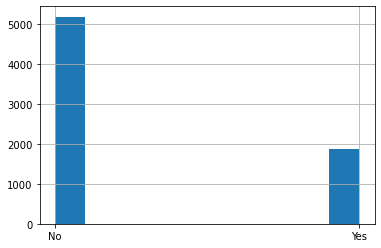

In [14]:
df['Churn'].hist()

In [15]:
len(df[df['Churn']=='Yes'])

1869

In [16]:
len(df[df['Churn']=='No'])

5174

In [17]:
1869/(1869+5174)

0.2653698707936959

In [18]:
#check for the missing values in the dataset
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [19]:
#from the above error we can see that there are values with blank
len(df[df['TotalCharges']==' '])

11

In [20]:
df[df['TotalCharges']==' ']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No,No,No,No,No,No,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No,No,No,No,No,No,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No,No,No,No,No,No,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No,No,No,No,No,No,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No,No,No,No,No,No,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No,No,No,No,No,No,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [21]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [22]:
#removin the blank rows in Total Charges
df1 = df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [23]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

C:\Users\Adithya\anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [24]:
df1['TotalCharges'].dtype

dtype('float64')

In [25]:
#findin the categorical and numerical columns in the dataset
cat_col = []
num_col = []
for i in df1.columns:
    if df1[i].dtypes == 'O':
        cat_col.append(i)
    else:
        num_col.append(i)

In [26]:
cat_col

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [27]:
num_col

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

# Correlation Matrix

<AxesSubplot:>

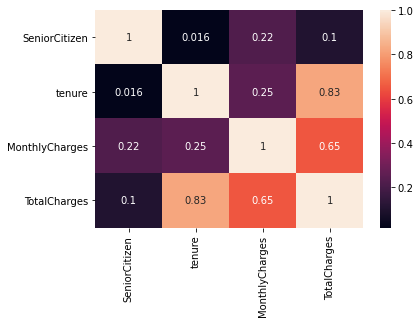

In [28]:
sns.heatmap(df1.corr(),annot = True)

1. As the tenure increases Monthly charges are also increasing
2. As the tenure increases Total charges are also increasing(highly correlated) 
3. As Monthly Charges increase Total charges are also increasing

# Chi-square Test

In [29]:
# import necessary libraries for chi-square test
from scipy.stats import stats,chi2_contingency
# creating function for performing chi-sqaure test on two columns
def chisq(i1,i2):
    print(str(i1) + " " + str(i2))
    dataset_table = pd.crosstab(df1[i1],df1[i2])
    #Contingency Table  
    stat, p, dof, expected = chi2_contingency(dataset_table)
    #Observed Values
    print(dataset_table.values)
    #Expected Values
    print(expected)   
    #Degree of Freedom
    print(dof)  
    
    #Significance Level 5%
    alpha = 0.05
    #chi-square statistic
    from scipy.stats import chi2
    chi_square=sum([(o-e)**2./e for o,e in zip(dataset_table.values,expected)])
    chi_square_statistic=chi_square[0]+chi_square[1]
    print("chi-square statistic:-",chi_square_statistic)
    #critical_value
    critical_value=chi2.ppf(q=1-alpha,df=dof)
    print('critical_value:',critical_value)
    
    #p-value
    p_value=1-chi2.cdf(x=chi_square_statistic,df=dof)
    print('p-value:',p_value)
    print('Significance level: ',alpha)
    print('Degree of Freedom: ',dof)
    print('p-value:',p_value)

    # conditional statements for checking chi-sqaure test condition for hypothesis selection based on chi_square_statistic and critical_value     
    if chi_square_statistic>=critical_value:
        print("Reject H0,There is a relationship between 2 categorical variables")
    else:
        print("Retain H0,There is no relationship between 2 categorical variables")
    # conditional statements for checking chi-sqaure test condition for hypothesis selection based on p_value and alpha
    if p_value<=alpha:
        print("Reject H0,There is a relationship between 2 categorical variables")
    else:
        print("Retain H0,There is no relationship between 2 categorical variables")
    
    print("XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX")

In [30]:
for i in range(len(cat_col)):
    for j in range(i+1):
        if i==j:
            continue
        else:
            chisq(cat_col[i],cat_col[j])

Partner gender
[[1800 1839]
 [1683 1710]]
[[1802.42278157 1836.57721843]
 [1680.57721843 1712.42278157]]
1
chi-square statistic:- 0.013373334879339354
critical_value: 3.841458820694124
p-value: 0.9079353747286687
Significance level:  0.05
Degree of Freedom:  1
p-value: 0.9079353747286687
Retain H0,There is no relationship between 2 categorical variables
Retain H0,There is no relationship between 2 categorical variables
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
Dependents gender
[[2460 2473]
 [1023 1076]]
[[2443.35025597 2489.64974403]
 [1039.64974403 1059.35025597]]
1
chi-square statistic:- 0.7531278027424451
critical_value: 3.841458820694124
p-value: 0.38548775316399964
Significance level:  0.05
Degree of Freedom:  1
p-value: 0.38548775316399964
Retain H0,There is no relationship between 2 categorical variables
Retain H0,There is no relationship between 2 categorical variables
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
Dependents Partner
[[

 [1223 1202]]
[[2281.88011945 2325.11988055]
 [1201.11988055 1223.88011945]]
1
chi-square statistic:- 1.205442598132465
critical_value: 3.841458820694124
p-value: 0.27223658555628705
Significance level:  0.05
Degree of Freedom:  1
p-value: 0.27223658555628705
Retain H0,There is no relationship between 2 categorical variables
Retain H0,There is no relationship between 2 categorical variables
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
OnlineBackup Partner
[[2621 1986]
 [1018 1407]]
[[2384.08319113 2222.91680887]
 [1254.91680887 1170.08319113]]
1
chi-square statistic:- 141.49218863950756
critical_value: 3.841458820694124
p-value: 0.0
Significance level:  0.05
Degree of Freedom:  1
p-value: 0.0
Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
OnlineBackup Dependents
[[3268 1339]
 [1665  760]]
[[3231.84456769 1375.15543231]

critical_value: 3.841458820694124
p-value: 1.2403324500809276e-07
Significance level:  0.05
Degree of Freedom:  1
p-value: 1.2403324500809276e-07
Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
TechSupport PhoneService
[[ 393 4599]
 [ 287 1753]]
[[ 482.73037543 4509.26962457]
 [ 197.26962457 1842.73037543]]
1
chi-square statistic:- 63.64897432841984
critical_value: 3.841458820694124
p-value: 1.4432899320127035e-15
Significance level:  0.05
Degree of Freedom:  1
p-value: 1.4432899320127035e-15
Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
TechSupport MultipleLines
[[3044 1948]
 [1021 1019]]
[[2885.7337884 2106.2662116]
 [1179.2662116  860.7337884]]
1
chi-square statistic:- 70.913702248558
cri

[[1436 1345 1520]
 [ 980 1751    0]]
[[1477.70420933 1893.61433447  929.6814562 ]
 [ 938.29579067 1202.38566553  590.3185438 ]]
2
chi-square statistic:- 412.29120058128404
critical_value: 5.991464547107979
p-value: 0.0
Significance level:  0.05
Degree of Freedom:  2
p-value: 0.0
Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
StreamingMovies OnlineSecurity
[[3359  942]
 [1658 1073]]
[[3068.560438 1232.439562]
 [1948.439562  782.560438]]
1
chi-square statistic:- 247.02325398790373
critical_value: 3.841458820694124
p-value: 0.0
Significance level:  0.05
Degree of Freedom:  1
p-value: 0.0
Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
StreamingMovies OnlineBackup
[[3265 1036]
 [1342 1389]]
[[281

[[1935  929]
 [2130 2038]]
[[1655.59726962 1208.40273038]
 [2409.40273038 1758.59726962]]
1
chi-square statistic:- 188.54675295509708
critical_value: 3.841458820694124
p-value: 0.0
Significance level:  0.05
Degree of Freedom:  1
p-value: 0.0
Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
PaperlessBilling InternetService
[[1088  701 1075]
 [1328 2395  445]]
[[ 983.99089875 1260.94197952  619.06712173]
 [1432.00910125 1835.05802048  900.93287827]]
2
chi-square statistic:- 438.0580364896312
critical_value: 5.991464547107979
p-value: 0.0
Significance level:  0.05
Degree of Freedom:  2
p-value: 0.0
Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
PaperlessBilling OnlineSecurity
[[2037  827]
 [2980 

[[ 849.72269625  322.78498294  369.49232082]
 [ 838.15059727  318.3890785   364.46032423]
 [1303.23876564  495.0625711   566.69866325]
 [ 883.88794084  335.76336746  384.3486917 ]]
6
chi-square statistic:- 492.02110722656664
critical_value: 12.591587243743977
p-value: 0.0
Significance level:  0.05
Degree of Freedom:  6
p-value: 0.0
Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
PaymentMethod PaperlessBilling
[[ 653  889]
 [ 639  882]
 [ 623 1742]
 [ 949  655]]
[[ 628.02730375  913.97269625]
 [ 619.47440273  901.52559727]
 [ 963.21956769 1401.78043231]
 [ 653.27872582  950.72127418]]
3
chi-square statistic:- 431.30479686899463
critical_value: 7.814727903251179
p-value: 0.0
Significance level:  0.05
Degree of Freedom:  3
p-value: 0.0
Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 

# Data Visualization

In [31]:
'''
Performing the Bivariate analysis on 2 major columns to know the churn rate about the most valuable customers and also the 
churn rate w.r.t Monthly charges.
'''

'\nPerforming the Bivariate analysis on 2 major columns to know the churn rate about the most valuable customers and also the \nchurn rate w.r.t Monthly charges.\n'

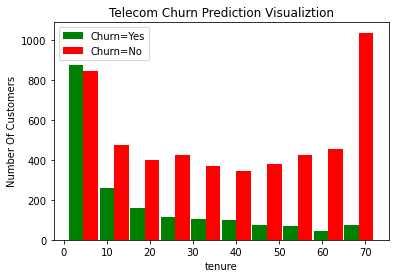

In [32]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Telecom Churn Prediction Visualiztion")


plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

1. We can observe that the people who has taken the telephone connection in the past 10 months are quitting the services
2. As the tenure increases the Churn rate is getting decreased

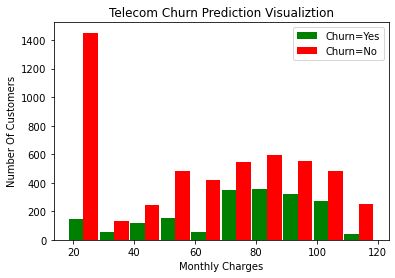

In [33]:
mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges      
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges      

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Telecom Churn Prediction Visualiztion")

plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

1. The people who are paying more Monthly charges has low churn rate
2. Company needs to target the customers whose monthly charges were between 70-110 as they were leaving more

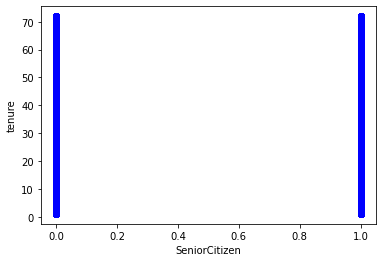

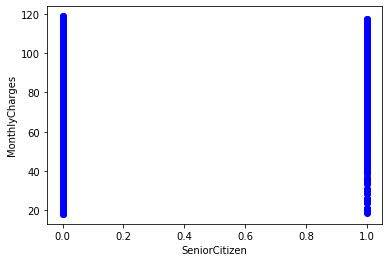

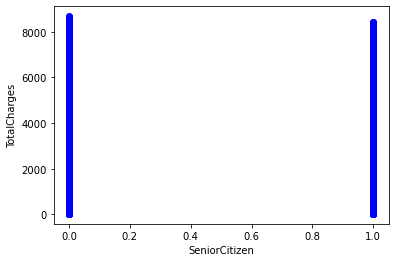

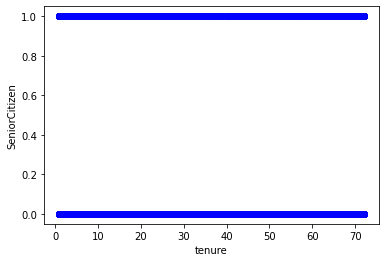

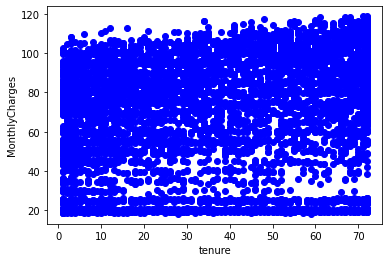

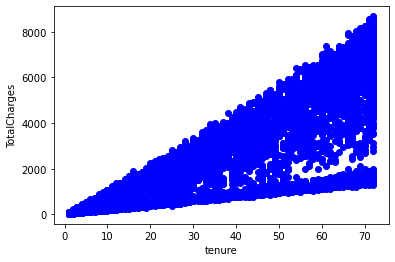

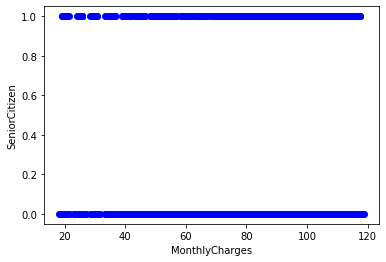

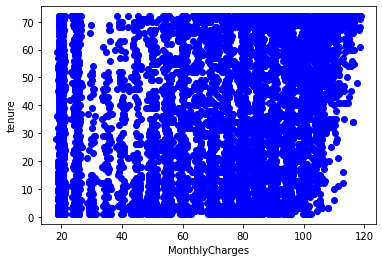

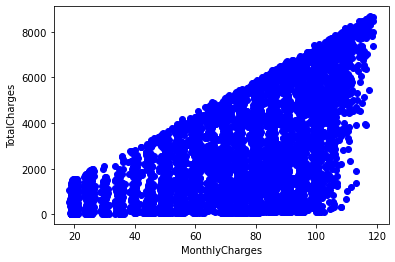

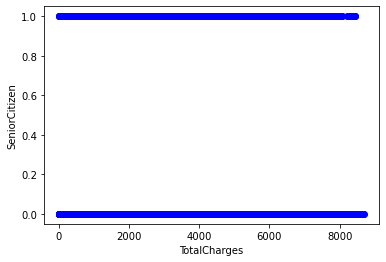

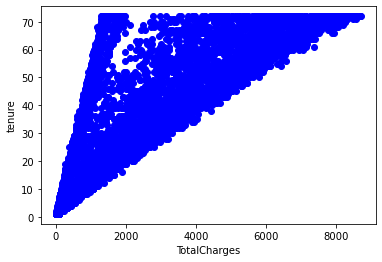

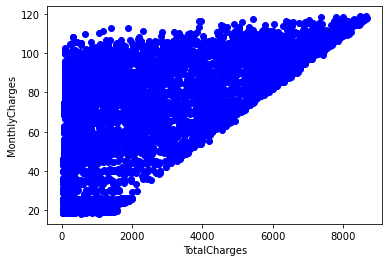

In [34]:
# Scatter plot using matplotlib 
import itertools
import matplotlib.pyplot as plt
# create function for ploting scatterplot between two columns of dataset
def scatter(i,j):
    plt.scatter(df1[i],df1[j],c ="blue")
    plt.xlabel(i)
    plt.ylabel(j)
    plt.show()

# Loop through numerical data list and use function to scatter plot between two columns
l1 = list(itertools.permutations(num_col, 2))

for i in l1:
    scatter(i[0],i[1])

# results
1. As the tenure increases Monthly chares are also increasing
2. As the tenure increases Total chares are also increasing
3. As Monthly Charges increase Total charges are also increasin

array([[<AxesSubplot:title={'center':'SeniorCitizen'}>,
        <AxesSubplot:title={'center':'tenure'}>],
       [<AxesSubplot:title={'center':'MonthlyCharges'}>,
        <AxesSubplot:title={'center':'TotalCharges'}>]], dtype=object)

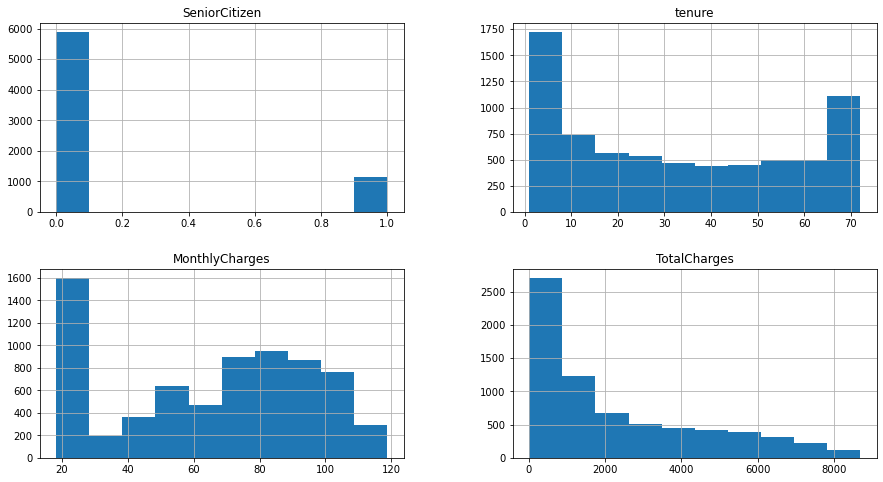

In [35]:
# Histogram using pandas 
df1[num_col].hist(figsize =(15,8))

1. There are more number of senior citizens
2. Total Charges are skewed towards right

# groupby

<AxesSubplot:xlabel='Churn'>

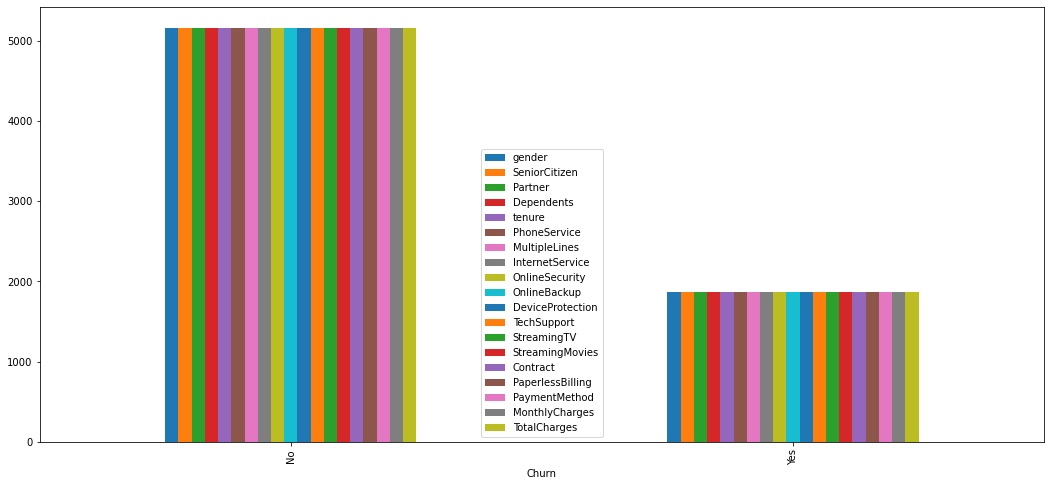

In [36]:
# goup data by jobType and plot count plot
df1.groupby('Churn').count().plot(kind='bar',figsize = (18,8))

## Box Plot

C:\Users\Adithya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


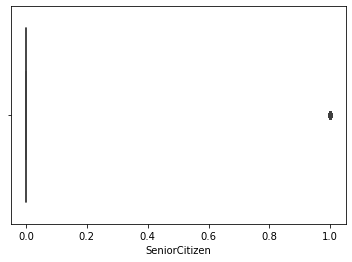

C:\Users\Adithya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


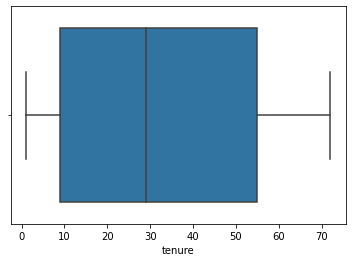

C:\Users\Adithya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


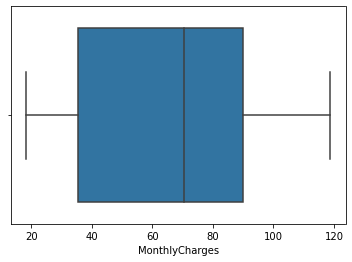

C:\Users\Adithya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


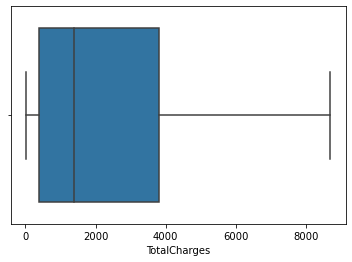

In [37]:
for i in num_col:
    sns.boxplot(df1[i])
    plt.show()

# Converting categorical features to numerical features

In [38]:
cat_col

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [39]:
for i in cat_col:
    print(str(i) + ": "+str(df1[i].unique()))

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [40]:
#Replacing the Yes and No with 0 and 1
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No': 0},inplace=True)

C:\Users\Adithya\anaconda3\lib\site-packages\pandas\core\series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [41]:
for col in df1:
    print(f'{col}: {df1[col].unique()}') 

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [42]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

# One hot encoding for categorical columns

In [43]:
df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [44]:
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [45]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

# scaling the data

In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
sc = StandardScaler()
X_scaled = pd.DataFrame(sc.fit_transform(X),columns = X.columns)


In [48]:
X_scaled

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1.009430,-0.440327,1.035617,-0.652305,-1.280248,-3.056334,-0.854336,-0.633746,1.378330,-0.723918,...,1.382243,-0.886896,-0.52513,0.902613,-0.514537,-0.561364,-0.529976,-0.525351,1.404764,-0.543604
1,-0.990658,-0.440327,-0.965608,-0.652305,0.064303,0.327189,-0.854336,1.577918,-0.725516,1.381372,...,1.382243,-0.886896,-0.52513,-1.107895,1.943495,-0.561364,-0.529976,-0.525351,-0.711863,1.839576
2,-0.990658,-0.440327,-0.965608,-0.652305,-1.239504,0.327189,-0.854336,1.577918,1.378330,-0.723918,...,1.382243,-0.886896,-0.52513,0.902613,-0.514537,-0.561364,-0.529976,-0.525351,-0.711863,1.839576
3,-0.990658,-0.440327,-0.965608,-0.652305,0.512486,-3.056334,-0.854336,1.577918,-0.725516,1.381372,...,1.382243,-0.886896,-0.52513,-1.107895,1.943495,-0.561364,1.886879,-0.525351,-0.711863,-0.543604
4,1.009430,-0.440327,-0.965608,-0.652305,-1.239504,0.327189,-0.854336,-0.633746,-0.725516,-0.723918,...,-0.723462,1.127527,-0.52513,0.902613,-0.514537,-0.561364,-0.529976,-0.525351,1.404764,-0.543604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,-0.990658,-0.440327,1.035617,1.533025,-0.343137,0.327189,1.170500,1.577918,-0.725516,1.381372,...,1.382243,-0.886896,-0.52513,-1.107895,1.943495,-0.561364,-0.529976,-0.525351,-0.711863,1.839576
7028,1.009430,-0.440327,1.035617,1.533025,1.612573,0.327189,1.170500,-0.633746,1.378330,1.381372,...,-0.723462,1.127527,-0.52513,-1.107895,1.943495,-0.561364,-0.529976,1.903490,-0.711863,-0.543604
7029,1.009430,-0.440327,1.035617,1.533025,-0.872808,-3.056334,-0.854336,1.577918,-0.725516,-0.723918,...,1.382243,-0.886896,-0.52513,0.902613,-0.514537,-0.561364,-0.529976,-0.525351,1.404764,-0.543604
7030,-0.990658,2.271039,1.035617,-0.652305,-1.158016,0.327189,1.170500,-0.633746,-0.725516,-0.723918,...,-0.723462,1.127527,-0.52513,0.902613,-0.514537,-0.561364,-0.529976,-0.525351,-0.711863,1.839576


# Splitting the data into train_test split

In [49]:
from sklearn.model_selection import train_test_split

In [50]:


from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.20,random_state=5)

# Feature Selection using SelectKbest

In [53]:
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(k=10,score_func = f_classif)
train_df_selected = selector.fit_transform(x_train,y_train)
train_df_selected = x_train.columns[selector.get_support()]
train_df_selected

Index(['tenure', 'OnlineSecurity', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'InternetService_Fiber optic', 'InternetService_No',
       'Contract_Month-to-month', 'Contract_Two year',
       'PaymentMethod_Electronic check'],
      dtype='object')

In [54]:
x_train = x_train[train_df_selected]
x_test = x_test[train_df_selected]

In [55]:
x_train.head()

,tenure,OnlineSecurity,PaperlessBilling,MonthlyCharges,TotalCharges,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_Two year,PaymentMethod_Electronic check
5655,-0.913552,-0.633746,0.828939,0.658220,-0.625494,1.127527,-0.525130,0.902613,-0.561364,-0.711863
101,-1.280248,-0.633746,-1.206361,-1.507395,-0.998782,-0.886896,1.904289,0.902613,-0.561364,1.404764
2616,1.571829,-0.633746,0.828939,0.475398,1.447779,-0.886896,-0.525130,-1.107895,1.781374,-0.711863
392,-1.239504,-0.633746,0.828939,-0.681370,-0.967965,-0.886896,-0.525130,0.902613,-0.561364,1.404764
1323,1.082902,-0.633746,0.828939,1.153503,1.622599,1.127527,-0.525130,-1.107895,-0.561364,-0.711863


# Handling Imbalanced Dataset

In [56]:
from imblearn.over_sampling import RandomOverSampler

In [57]:
# Applying SMOTE
from imblearn.over_sampling import SMOTE
from collections import Counter
smote = SMOTE(sampling_strategy='all')
X_train_sm,y_train_sm = smote.fit_resample(x_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_sm)))

The number of classes before fit Counter({0: 4164, 1: 1461})
The number of classes after fit Counter({1: 4164, 0: 4164})


In [58]:
# importing necessary libraries for geting metrics of models

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

# Function for calculating all the relevant metrics 
def score(m):
    y_pred = m.predict(x_test)
    print(classification_report(y_pred,y_test))



In [59]:
# Helper function for Visualizing importance of all the features in the dataset for the prediction
import matplotlib.pyplot as plt
def vis_imp(feature_imp,feat_train_df):
    
    # creating dataframe for feature name and feature importance
    feature_imp_df = pd.DataFrame()
    
    df1 = pd.DataFrame()
    df1['feature_imp'] = feature_imp
    df1['column'] = feat_train_df.columns
    feature_imp_df = pd.concat([feature_imp_df,df1],axis = 0,ignore_index = True)
    # grouping all data and sorting in descending order
    order = feature_imp_df.groupby('column').sum()[['feature_imp']].sort_values('feature_imp',ascending = False).index[:50]
    # ploting feature importance data using boxenplot
    fig,ax = plt.subplots(figsize = (8,max(6,len(order)* .25)))
    sns.boxenplot(data = feature_imp_df,x = 'feature_imp',y = 'column',order = order,ax= ax, palette = 'viridis',orient = 'h')
    ax.tick_params(axis = 'x',rotation = 0)
    ax.set_title('Importance')
    ax.grid()
    fig.tight_layout()
    
    # return fig, ax
    return fig,ax

# Applying Logistic Regression

              precision    recall  f1-score   support

           0       0.69      0.92      0.79       756
           1       0.85      0.53      0.65       651

    accuracy                           0.74      1407
   macro avg       0.77      0.72      0.72      1407
weighted avg       0.76      0.74      0.73      1407

Wall time: 254 ms


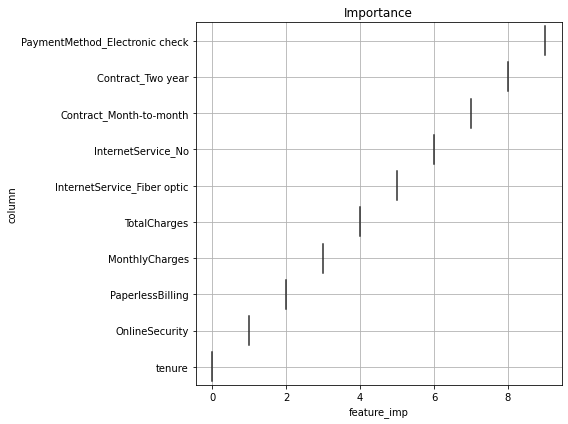

In [60]:
%%time
# Fit a logistic Regression model to the train dataset

# Import logisticRegressor
from sklearn.linear_model import LogisticRegression

# Instantiate the model
logi = LogisticRegression(random_state = 0)

# fitting the model on train data
logi.fit(X_train_sm,y_train_sm)
# print score of the model by calling function
score(logi)
# visualizing importance of features
importance = logi.coef_[0]
fig,ax = vis_imp([x for x in range(len(importance))],X_train_sm)



# KNN Classifier

In [61]:
%%time
# Fit a K-Neighbour classifier model to the train dataset

# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier 

# Instantiate the model
knn= KNeighborsClassifier(n_neighbors=4, metric='minkowski', p=2 ) 
# fitting the model on train data
knn.fit(X_train_sm,y_train_sm)
# print score of the model by calling function
score(knn)


              precision    recall  f1-score   support

           0       0.81      0.82      0.82       981
           1       0.58      0.55      0.57       426

    accuracy                           0.74      1407
   macro avg       0.69      0.69      0.69      1407
weighted avg       0.74      0.74      0.74      1407

Wall time: 159 ms


# Random Forest Classifier

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       977
           1       0.60      0.57      0.58       430

    accuracy                           0.75      1407
   macro avg       0.71      0.70      0.70      1407
weighted avg       0.75      0.75      0.75      1407

Wall time: 1.2 s


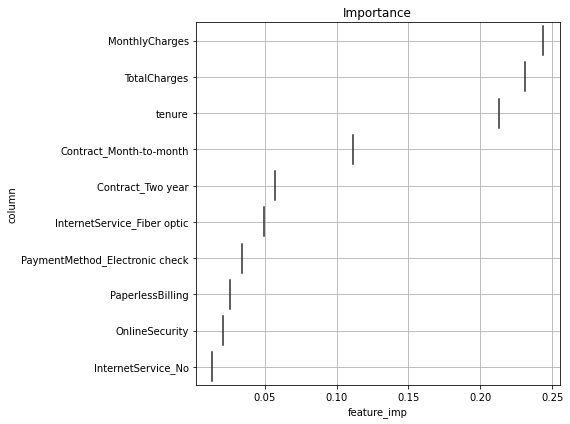

In [62]:
%%time
# Fit a RandomForestClassifier model to the train dataset
from sklearn.ensemble import RandomForestClassifier
#import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
# Instantiate the model
rf = RandomForestClassifier(n_estimators=100)
# fitting the model on train data
rf.fit(X_train_sm,y_train_sm)
# print score of the model
score(rf)
# visualizing importance of features

fig,ax = vis_imp(rf.feature_importances_,X_train_sm)


# ADA BOOST CLASSIFIER

              precision    recall  f1-score   support

           0       0.70      0.92      0.79       759
           1       0.85      0.53      0.66       648

    accuracy                           0.74      1407
   macro avg       0.77      0.73      0.72      1407
weighted avg       0.77      0.74      0.73      1407

Wall time: 510 ms


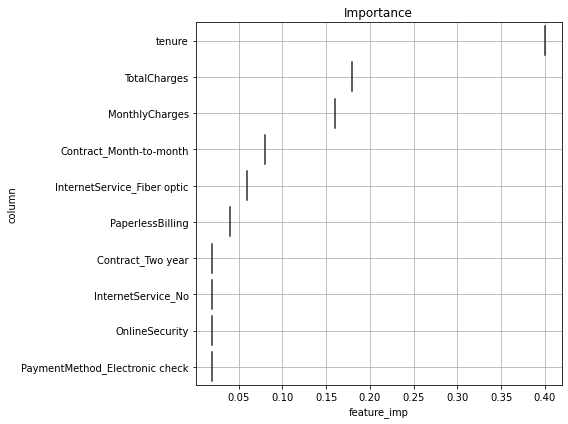

In [63]:
%%time
# Fit a AdaBoost classifier model to the train dataset

# Import AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
# Instantiate the model
ada = AdaBoostClassifier()
# fitting the model on train data
ada.fit(X_train_sm,y_train_sm)
# print score of the model by calling function
score(ada)
# visualizing importance of features

fig,ax = vis_imp(ada.feature_importances_,X_train_sm)



# SUPORT VECTOR CLASSIFIER

In [64]:
%%time
# Fit a support vector classifier model to the train dataset

#import SVC
from sklearn.svm import SVC 
# Instantiate the model
clf = SVC()
#fit the model on train data
clf.fit(X_train_sm,y_train_sm)

# print score of the model by calling function
score(clf)

              precision    recall  f1-score   support

           0       0.72      0.90      0.80       800
           1       0.81      0.54      0.65       607

    accuracy                           0.75      1407
   macro avg       0.76      0.72      0.72      1407
weighted avg       0.76      0.75      0.74      1407

Wall time: 2.45 s


# DESISION TREE CLASSICIFIER

              precision    recall  f1-score   support

           0       0.78      0.81      0.79       956
           1       0.56      0.51      0.53       451

    accuracy                           0.71      1407
   macro avg       0.67      0.66      0.66      1407
weighted avg       0.71      0.71      0.71      1407

Wall time: 187 ms


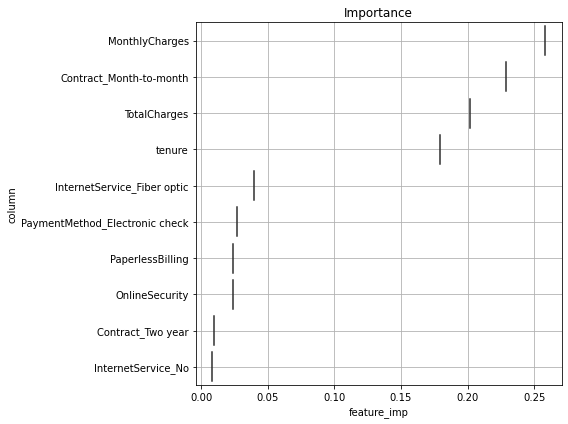

In [65]:
%%time
# Fit a DecisionTreeClassifier model to the train dataset

#import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
# Instantiate the model
dt = DecisionTreeClassifier()
# fitting the model on train data
dt.fit(X_train_sm,y_train_sm)
# print score of the model by calling function
score(dt)
# visualizing importance of features
fig,ax = vis_imp(dt.feature_importances_,X_train_sm)

# BAGGING CLASSIFIER

In [255]:
%%time
# Fit a Bagging Classifier model to the train dataset

# Import BaggingClassifier
from sklearn.ensemble import BaggingClassifier
# Instantiate the model

base_cls = RandomForestClassifier()

num_trees = 200

seed = 8

bc = BaggingClassifier(base_estimator = base_cls,
                          n_estimators = num_trees,
                          random_state = seed)
# fitting the model on train data
bc.fit(X_train_sm,y_train_sm)
# print score of the model
score(bc)



              precision    recall  f1-score   support

         0.0       0.80      0.86      0.83       927
         1.0       0.68      0.58      0.62       480

    accuracy                           0.76      1407
   macro avg       0.74      0.72      0.73      1407
weighted avg       0.76      0.76      0.76      1407

Wall time: 2min 39s


# XGB Classifier

C:\Users\Adithya\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:41:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       930
           1       0.67      0.57      0.62       477

    accuracy                           0.76      1407
   macro avg       0.73      0.72      0.72      1407
weighted avg       0.75      0.76      0.76      1407

Wall time: 2.45 s


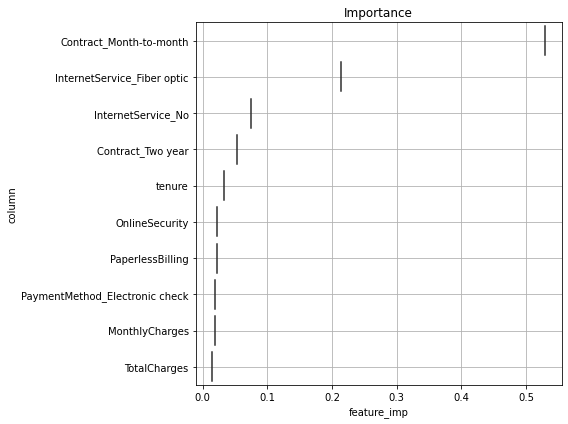

In [66]:
%%time
# Fit a XGBClassifier model to the train dataset

# Import XGBClassifier
import xgboost as xgb
# Instantiate the model
xgb_model = xgb.XGBClassifier(random_state=42)
# fitting the model on train data
xgb_model.fit(X_train_sm,y_train_sm)
# print score of the model
score(xgb_model)
# visualizing importance of features
fig,ax = vis_imp(xgb_model.feature_importances_,X_train_sm)


# LightGBM

              precision    recall  f1-score   support

           0       0.76      0.88      0.81       867
           1       0.74      0.56      0.64       540

    accuracy                           0.75      1407
   macro avg       0.75      0.72      0.72      1407
weighted avg       0.75      0.75      0.75      1407

Wall time: 9.93 s


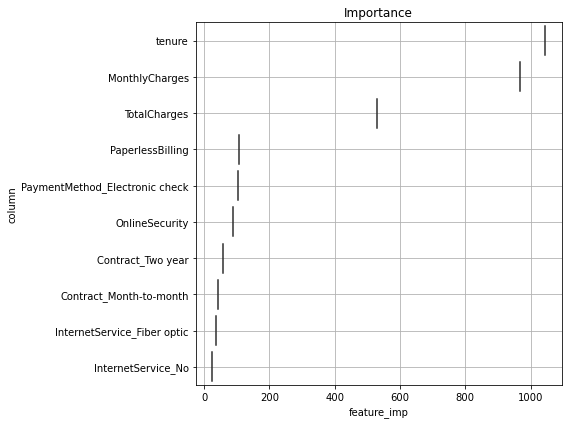

In [67]:
%%time
# Fit a XGBClassifier model to the train dataset

# Import XGBClassifier
import lightgbm as lgb
# Instantiate the model
lgb_model = lgb.LGBMClassifier(learning_rate=0.09,max_depth=-5,random_state=42)
# fitting the model on train data
lgb_model.fit(X_train_sm,y_train_sm)
# print score of the model
score(lgb_model)
# visualizing importance of features
fig,ax = vis_imp(lgb_model.feature_importances_,X_train_sm)

# Hyperparameter tuning

In [68]:
import warnings
warnings.filterwarnings("ignore")
# Helper function to perform hyper parameter tunning with RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV,KFold,RepeatedKFold,RepeatedStratifiedKFold
def randomcv(model,params):
# Random search of parameters, using 3 fold cross validation,
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=1)
    gs1 = RandomizedSearchCV(model, params,n_iter = 2, cv = cv, n_jobs = 6,verbose = 2, random_state = 42)
# search across 100 different combinations, and use all available cores
    gs1.fit(X_train_sm,y_train_sm)  
# print best parameters
    print(gs1.best_estimator_)

In [69]:
%%time
from scipy.stats import loguniform
# create logistic regressor parameters dict for tunning
lg_param_grid = {
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100]
}

# passing data for hyper parameter tunning with Randomized search cv
randomcv(logi,lg_param_grid)

Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.


LogisticRegression(C=100, random_state=0, solver='liblinear')
Wall time: 6.64 s


[Parallel(n_jobs=6)]: Done  20 out of  20 | elapsed:    6.5s remaining:    0.0s
[Parallel(n_jobs=6)]: Done  20 out of  20 | elapsed:    6.5s finished


In [88]:
logi1 = LogisticRegression(C=100, random_state=0, solver='liblinear')
logi1.fit(X_train_sm,y_train_sm)
score(logi1)

              precision    recall  f1-score   support

           0       0.69      0.92      0.79       756
           1       0.85      0.53      0.65       651

    accuracy                           0.74      1407
   macro avg       0.77      0.72      0.72      1407
weighted avg       0.76      0.74      0.73      1407



In [71]:
%%time
# create RandomForest classifier parameters dict for tunning
rf_param_grid = {
    'max_depth' : [x for x in range(1,30)],
    'min_samples_split': [x for x in range(1,30)],
    'min_samples_leaf': [x for x in range(1,30)],
    'n_estimators': [1, 10, 100, 1000],
    'max_features': ['sqrt', 'log2',None,'auto']
}

# passing data for hyper parameter tunning with Randomized search cv
randomcv(rf,rf_param_grid)

Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  20 out of  20 | elapsed:   32.2s remaining:    0.0s
[Parallel(n_jobs=6)]: Done  20 out of  20 | elapsed:   32.2s finished


RandomForestClassifier(max_depth=10, max_features='sqrt', min_samples_leaf=8,
                       min_samples_split=11)
Wall time: 33 s


In [73]:
rf1 = RandomForestClassifier(max_depth=10, max_features='sqrt', min_samples_leaf=8,
                       min_samples_split=11)
rf1.fit(X_train_sm,y_train_sm)
score(rf1)

              precision    recall  f1-score   support

           0       0.74      0.91      0.82       819
           1       0.82      0.57      0.67       588

    accuracy                           0.77      1407
   macro avg       0.78      0.74      0.74      1407
weighted avg       0.77      0.77      0.76      1407



In [74]:
%%time
# create KNN classifier parameters dict for tunning
knn_param = {
    'leaf_size': [x for x in range(1,100)],
    'n_neighbors': [x for x in range(1,100)],
    'p': [1,2]
}
# passing data for hyper parameter tunning with Randomized search cv
randomcv(knn,knn_param)

Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.


KNeighborsClassifier(leaf_size=5, n_neighbors=35, p=1)
Wall time: 1.85 s


[Parallel(n_jobs=6)]: Done  20 out of  20 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=6)]: Done  20 out of  20 | elapsed:    1.7s finished


In [75]:
knn1 = KNeighborsClassifier(leaf_size=5, n_neighbors=35, p=1)
knn1.fit(X_train_sm,y_train_sm)
score(knn1)

              precision    recall  f1-score   support

           0       0.70      0.90      0.79       776
           1       0.81      0.52      0.63       631

    accuracy                           0.73      1407
   macro avg       0.75      0.71      0.71      1407
weighted avg       0.75      0.73      0.72      1407



In [76]:
%%time
# create XGBoost parameters dict in list for tunning
xgb_param = {
    'n_estimators': [10, 50, 100, 500],
    'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0],
    'n_estimators': [x for x in range(1,100)],
    'subsample':[0.6,0.7,0.75,0.8,0.85,0.9]
    
}

# passing data for hyper parameter tunning with Gridsearchcv
randomcv(xgb_model,xgb_param)

Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  20 out of  20 | elapsed:    3.3s remaining:    0.0s
[Parallel(n_jobs=6)]: Done  20 out of  20 | elapsed:    3.3s finished


[01:48:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.001, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=45, n_jobs=4, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.75,
              tree_method='exact', validate_parameters=1, verbosity=None)
Wall time: 3.84 s


In [78]:
xgb1 = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.001, max_delta_step=0, max_depth=6,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=45, n_jobs=4, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.75,
              tree_method='exact', validate_parameters=1, verbosity=None)
xgb1.fit(X_train_sm,y_train_sm)
score(xgb1)

[01:48:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.71      0.92      0.80       778
           1       0.84      0.55      0.66       629

    accuracy                           0.75      1407
   macro avg       0.78      0.73      0.73      1407
weighted avg       0.77      0.75      0.74      1407



In [91]:
#Applying pycaret 

In [79]:
from pycaret.classification import *
s = setup(data = df2, target = 'Churn', session_id=123)

,Description,Value
0,session_id,123
1,Target,Churn
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(7032, 27)"
5,Missing Values,False
6,Numeric Features,13
7,Categorical Features,13
8,Ordinal Features,False
9,High Cardinality Features,False


In [80]:
best_model = compare_models(sort = 'Accuracy')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8056,0.8380,0.5166,0.6450,0.5730,0.4492,0.4543,0.3570
ridge,Ridge Classifier,0.8037,0.0000,0.4739,0.6562,0.5496,0.4283,0.4381,0.0360
ada,Ada Boost Classifier,0.8027,0.8376,0.4892,0.6455,0.5555,0.4320,0.4395,0.1400
gbc,Gradient Boosting Classifier,0.8005,0.8372,0.4763,0.6420,0.5457,0.4218,0.4301,0.3300
lda,Linear Discriminant Analysis,0.7979,0.8303,0.5246,0.6190,0.5673,0.4367,0.4396,0.0400
rf,Random Forest Classifier,0.7948,0.8213,0.4659,0.6272,0.5338,0.4060,0.4139,0.3160
lightgbm,Light Gradient Boosting Machine,0.7926,0.8229,0.4932,0.6126,0.5453,0.4132,0.4179,0.2680
et,Extra Trees Classifier,0.7855,0.8003,0.4707,0.5965,0.5256,0.3895,0.3944,0.3300
xgboost,Extreme Gradient Boosting,0.7844,0.8108,0.4706,0.5925,0.5237,0.3870,0.3917,0.5900
knn,K Neighbors Classifier,0.7767,0.7458,0.4369,0.5817,0.4970,0.3575,0.3647,0.0550


In [81]:
print(best_model)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [82]:
# check available models
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [83]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7992,0.8110,0.4800,0.6383,0.5479,0.4222,0.4293
1,0.7850,0.8334,0.5120,0.5872,0.5470,0.4069,0.4086
2,0.7907,0.8362,0.4640,0.6170,0.5297,0.3985,0.4052
3,0.8110,0.8347,0.5161,0.6598,0.5792,0.4596,0.4654
4,0.8110,0.8447,0.5565,0.6449,0.5974,0.4748,0.4770
5,0.7846,0.8144,0.5323,0.5789,0.5546,0.4129,0.4135
6,0.8252,0.8682,0.5484,0.6939,0.6126,0.5017,0.5075
7,0.7907,0.8267,0.4597,0.6129,0.5253,0.3946,0.4013
8,0.8272,0.8490,0.5565,0.6970,0.6188,0.5089,0.5143
9,0.8313,0.8614,0.5403,0.7204,0.6175,0.5121,0.5208


In [84]:
tuned_lr = tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7951,0.8134,0.4640,0.6304,0.5346,0.4071,0.4150
1,0.7870,0.8333,0.5120,0.5926,0.5494,0.4109,0.4128
2,0.7927,0.8359,0.4720,0.6211,0.5364,0.4060,0.4124
3,0.8089,0.8355,0.5161,0.6531,0.5766,0.4554,0.4606
4,0.8110,0.8446,0.5565,0.6449,0.5974,0.4748,0.4770
5,0.7988,0.8151,0.5403,0.6147,0.5751,0.4440,0.4456
6,0.8211,0.8661,0.5565,0.6765,0.6106,0.4959,0.4999
7,0.7927,0.8267,0.4677,0.6170,0.5321,0.4022,0.4085
8,0.8272,0.8495,0.5645,0.6931,0.6222,0.5117,0.5163
9,0.8313,0.8617,0.5403,0.7204,0.6175,0.5121,0.5208


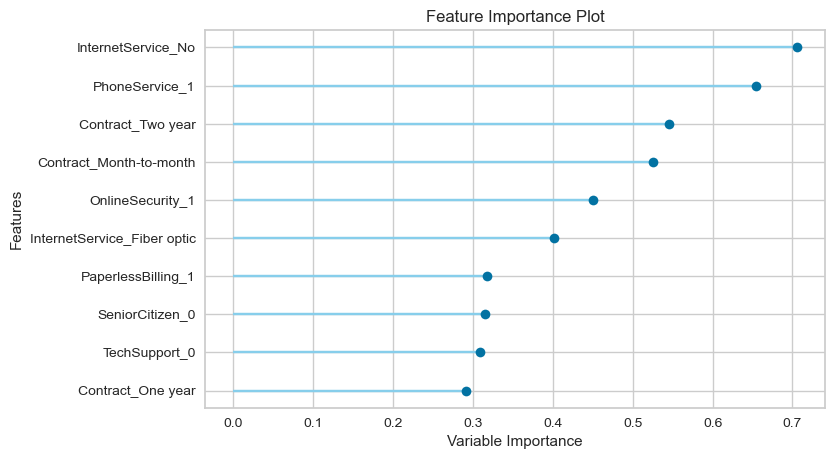

In [85]:
plot_model(tuned_lr, plot='feature')

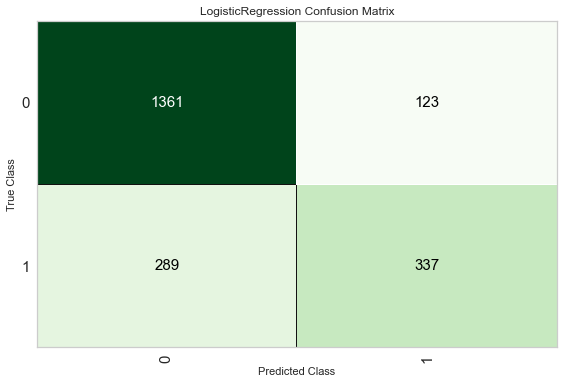

In [86]:
plot_model(tuned_lr, plot = 'confusion_matrix')

In [87]:
evaluate_model(tuned_lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [89]:
# finalize rf model
final_lr = finalize_model(tuned_lr)
# print final model parameters
print(final_lr)

LogisticRegression(C=7.863, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [90]:
predict_model(final_lr)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.8047,0.8619,0.5607,0.7193,0.6302,0.5003,0.5074


,tenure,MonthlyCharges,TotalCharges,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),...,OnlineSecurity_1,OnlineBackup_1,DeviceProtection_1,TechSupport_0,StreamingTV_1,StreamingMovies_0,PaperlessBilling_1,Churn,Label,Score
0,35.0,20.200001,684.400024,0,0,1,0,0,1,0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0,0,0.9827
1,18.0,75.900002,1373.050049,0,1,0,1,0,0,1,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0,0,0.6186
2,65.0,103.150002,6792.450195,0,1,0,0,1,0,1,...,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0,0,0.7566
3,49.0,56.299999,2780.600098,1,0,0,0,1,0,0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0,0,0.9187
4,37.0,99.500000,3762.000000,0,1,0,1,0,0,0,...,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1,1,0.6224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2105,71.0,99.199997,7213.750000,0,1,0,0,0,1,0,...,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0,0,0.8422
2106,3.0,73.599998,232.500000,0,1,0,1,0,0,0,...,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0,1,0.5713
2107,3.0,20.400000,63.150002,0,0,1,1,0,0,0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0,0,0.8119
2108,7.0,20.250000,129.149994,0,0,1,0,1,0,0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0,0,0.9222
